# Anomaly detection with Autoencoder

In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'dashlink/'

In [0]:
from fastai.vision import *
import torchvision
import torchvision.transforms as T
from torchvision import datasets
import torch

In [0]:
# path = Path('Tail_687_1/png1'); path
trnpath = Path(base_dir + 'Tail_687_1'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Tail_687_1')

In [0]:
# set output folder
outpath = Path('png4a'); outpath

PosixPath('png4a')

In [0]:
# path.ls()
! ls -alh "{trnpath}"/{outpath}

total 8.0K
drwx------ 2 root root 4.0K Aug 22 21:23 non
drwx------ 2 root root 4.0K Aug 21 15:52 typ


## Data

---



In [0]:
bs = 16
# bs = 32

### Create Tentative Dataset

In [0]:
#typpath = Path('typ')
##traindir = trnpath/outpath/typpath; traindir
traindir = trnpath/outpath; traindir

PosixPath('/content/gdrive/My Drive/dashlink/Tail_687_1/png4a')

In [0]:
#Compose means applied in a sequence
# train_transform = T.Compose([T.Resize([130,130]), T.ToTensor(), T.Normalize(pop_mean, pop_std)])
tent_transform = T.Compose([T.Resize([130,130]), T.ToTensor()])

In [0]:
tent_dataset = datasets.ImageFolder(str(traindir), tent_transform)
# dataset.classes
len(tent_dataset.samples)

474

### Create Tentative DataLoader

In [0]:
# train_loader = torch.utils.data.DataLoader(data.train_ds, batch_size=bs, shuffle=True, num_workers=1)
# valid_loader = torch.utils.data.DataLoader(data.valid_ds, batch_size=bs, shuffle=True, num_workers=1)
tent_loader =  torch.utils.data.DataLoader(tent_dataset, batch_size=bs, shuffle=True, num_workers=2)
# valid_loader =  torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=False, num_workers=2)

In [0]:
len(tent_loader.dataset.samples)

474

### Normalize data

In [0]:
# for i in range(len(il)):
#   if(i==2): break
#   numpy_image = il[i].data.cpu().data.numpy(); print(numpy_image)
#   #numpy_image = xb[0].cpu().data.numpy(); print(numpy_image)
# #   batch_mean = np.mean(numpy_image, axis=(0,2,3))
# #   batch_std = np.std(numpy_image, axis=(0,2,3))

# il[0].data

# xb,yb = iter(data.train_dl.dl).next()
# print(f'len(xb[1]): {len(xb[1])}')
# # print(f'type(xb[0]): {type(xb[0])}')
# # xb[0]

#### Experiment with one batch of toy data

In [0]:
# ib = torch.tensor([[[[1,1],
#                      [1,1],
#                      [1,1]],
#                     [[2,2],
#                      [2,2],
#                      [2,2]],
#                     [[3,3],
#                      [3,3],
#                      [3,3]]],
#                    [[[4,4],
#                      [4,4],
#                      [4,4]],
#                     [[5,5],
#                      [5,5],
#                      [5,5]],
#                     [[6,6],
#                      [6,6],
#                      [6,6]]]]); ib

In [0]:
# numpy_ib = ib.cpu().data.numpy()
# np.sum(numpy_ib, axis=(0,2,3), keepdims=True)

#### Experiment with one batch of real data

In [0]:
xb,yb = iter(tent_loader).next()
xb_np = xb.cpu().data.numpy(); print(xb_np.shape)
#xb_np_mean = np.mean(xb_np, axis=(0,2,3), keepdims=True); print(xb_np_mean.shape)
xb_np_mean = np.mean(xb_np, axis=(0,2,3)); print(xb_np_mean.shape)
xb_np_std = np.std(xb_np, axis=(0,2,3)); print(xb_np_std.shape)
xb_np_mean,xb_np_std

(16, 3, 130, 130)
(3,)
(3,)


(array([0.984828, 0.984828, 0.984828], dtype=float32),
 array([0.090963, 0.090963, 0.090963], dtype=float32))

#### Normalize the real data

In [0]:
pop_mean = []
pop_std = []
for xb, yb in tent_loader:
  xb_np = xb.cpu().data.numpy(); #print(xb_np.shape)
  xb_np_mean = np.mean(xb_np, axis=(0,2,3)); #print(xb_np_mean.shape)
  xb_np_std = np.std(xb_np, axis=(0,2,3)); #print(xb_np_std.shape)
  pop_mean.append(xb_np_mean)
  pop_std.append(xb_np_std)
pop_mean = np.array(pop_mean)
pop_std = np.array(pop_std)

pop_mean = pop_mean.mean(axis=0)
pop_std = pop_std.mean(axis=0)
print(pop_mean, pop_std)

[0.984737 0.984737 0.984737] [0.091555 0.091555 0.091555]


In [0]:
print(pop_mean, pop_std)

[0.984737 0.984737 0.984737] [0.091555 0.091555 0.091555]


### Create Dataset

In [0]:
# import torchvision.transforms as T
# from torchvision import datasets

In [0]:
#typpath = Path('typ')
##traindir = trnpath/outpath/typpath; traindir
# traindir = trnpath/outpath; traindir

In [0]:
#Compose means applied in a sequence
train_transform = T.Compose([T.Resize([130,130]), T.ToTensor(), T.Normalize(pop_mean, pop_std)])

In [0]:
dataset = datasets.ImageFolder(str(traindir), train_transform)
dataset.classes

['non', 'typ']

### Create DataLoader

In [0]:
# train_loader = torch.utils.data.DataLoader(data.train_ds, batch_size=bs, shuffle=True, num_workers=1)
# valid_loader = torch.utils.data.DataLoader(data.valid_ds, batch_size=bs, shuffle=True, num_workers=1)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True, num_workers=2)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=False, num_workers=2)

### Show a batch of images

In [0]:
xb,yb = iter(train_loader).next()
# xb_np = xb.cpu().data.numpy(); print(xb_np.shape)

xb.shape

torch.Size([16, 3, 130, 130])

In [0]:
xb[0].shape

torch.Size([3, 130, 130])

In [0]:
images = torchvision.utils.make_grid(xb)
images.shape

torch.Size([3, 266, 1058])

In [0]:
images = np.transpose(images, (1,2,0))
images.shape

torch.Size([266, 1058, 3])

In [0]:
m,M = images.min(),images.max()
m,M

(tensor(-10.7542), tensor(0.1667))

In [0]:
images_sc = (1/(abs(m)*M))*images + 0.5 #scale the normalized image to the range 0,1
len(images_sc)

266

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


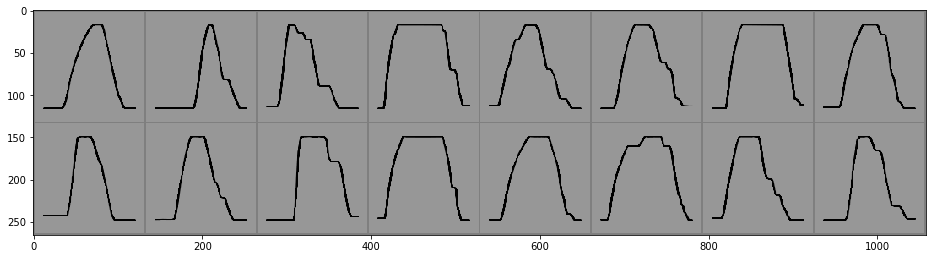

In [0]:
plt.figure(figsize=(16,12))
plt.imshow(images_sc)
plt.show()

## Model

In [0]:
# nn.Conv2d??
# nn.Conv2d(in_channels, #of input signal, i.e. filter depth
#           out_channels, #of output signal, i.e. # filters 
#           kernel_size, 
#           stride=1, padding=0, dilation=1, groups=1, 
#           bias=True, padding_mode='zeros')

In [0]:
# nn.Linear??
# nn.Linear(in_features, #of input signal, i.e. # columns 
#           out_features, #of output signal, i.e. # rows 
#           bias=True)

In [0]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    #input signal: 3 x 32 x 32
    self.conv1e = nn.Conv2d(  3,  24, 3, padding=2) #24 x 30 x 30
    self.conv2e = nn.Conv2d( 24,  48, 3, padding=2) #48 x 28 x 28
    self.conv3e = nn.Conv2d( 48,  96, 3, padding=2) #96 x 26 x 26
    self.conv4e = nn.Conv2d( 96, 128, 3, padding=2) #128 x 24 x 24
    self.conv5e = nn.Conv2d(128, 256, 3, padding=2) #256 x 22 x 22
    self.mp1e   = nn.MaxPool2d(2, return_indices=True) #256 x 11 x 11

    self.mp1d   = nn.MaxUnpool2d(2)
    self.conv5d = nn.ConvTranspose2d(256, 128, 3, padding=2)
    self.conv4d = nn.ConvTranspose2d(128,  96, 3, padding=2)
    self.conv3d = nn.ConvTranspose2d( 96,  48, 3, padding=2)
    self.conv2d = nn.ConvTranspose2d( 48,  24, 3, padding=2)
    self.conv1d = nn.ConvTranspose2d( 24,   3, 3, padding=2)
    
  def forward(self, x):
    #Encoder
    x = F.relu(self.conv1e(x))
    x = F.relu(self.conv2e(x))
    x = F.relu(self.conv3e(x))
    x = F.relu(self.conv4e(x))
    x = F.relu(self.conv5e(x))
    x,i = self.mp1e(x)
    #Decoder
    x = self.mp1d(x, i)
    x = F.relu(self.conv5d(x))
    x = F.relu(self.conv4d(x))
    x = F.relu(self.conv3d(x))
    x = F.relu(self.conv2d(x))
    x = F.relu(self.conv1d(x))    
    return x

In [0]:
#batch_size = 16 #get from databunch
# learning_rate = 1e-3 #.973
# learning_rate = 2e-3 #
learning_rate = 5e-3 #
# learning_rate = 1e-2 #

In [0]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print(device)

In [0]:
autoencoder = Autoencoder().cuda()
# autoencoder = Autoencoder()
# autoencoder.to(device)
##autoencoder = Autoencoder()

In [0]:
# parameters = list(autoencoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

## Train

In [0]:
#def show_img(orig, noisy, denoised):
def show_img(orig, reconstructed):
    fig=plt.figure()
    
    orig = orig.swapaxes(0, 1).swapaxes(1, 2)
    ##noisy = noisy.swapaxes(0, 1).swapaxes(1, 2)
    reconstructed = reconstructed.swapaxes(0, 1).swapaxes(1, 2)
    
    # Normalize for display purpose
    orig     = (orig - orig.min()) / (orig.max() - orig.min())
    ##noisy    = (noisy - noisy.min()) / (noisy.max() - noisy.min())
    reconstructed = (reconstructed - reconstructed.min()) / (reconstructed.max() - reconstructed.min())
    
    fig.add_subplot(1, 3, 1, title='Original')
    plt.imshow(orig)
    
    ##fig.add_subplot(1, 3, 2, title='Noisy')
    ##plt.imshow(noisy)
    
    fig.add_subplot(1, 3, 3, title='Reconstructed')
    plt.imshow(reconstructed)
    
    fig.subplots_adjust(wspace = 0.5)
    plt.show()
    
# To test
# show_img(cifar10_train[0][0].numpy(), cifar10_train[1][0].numpy(), cifar10_train[2][0].numpy())

... after Epoch 1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


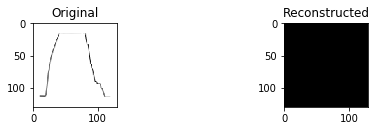

train_loss: 1.1191041747728983,    valid_loss: 1.0002852062384286
... after Epoch 2


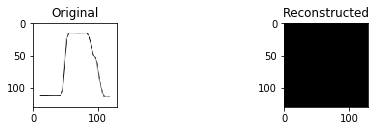

train_loss: 0.9998170713583628,    valid_loss: 0.9999815881252289
... after Epoch 3


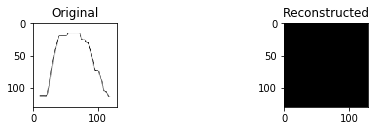

train_loss: 0.9999929507573445,    valid_loss: 0.9997328042984008
... after Epoch 4


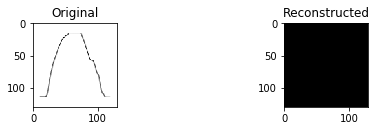

train_loss: 0.9998948693275451,    valid_loss: 0.9999393145243327
... after Epoch 5


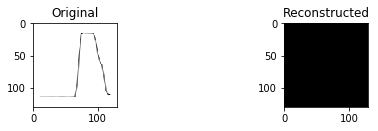

train_loss: 0.9998585661252339,    valid_loss: 0.9997477451960246
... after Epoch 6


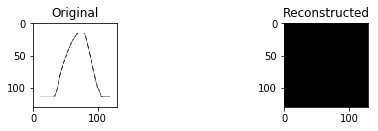

train_loss: 1.0001019616921742,    valid_loss: 0.9998506665229797
... after Epoch 7


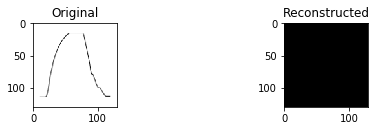

train_loss: 1.0000507672627768,    valid_loss: 0.9996656199296315
... after Epoch 8


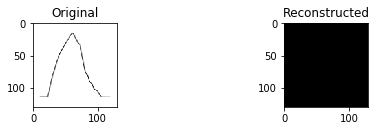

train_loss: 0.9999737004439037,    valid_loss: 0.9998890459537506
... after Epoch 9


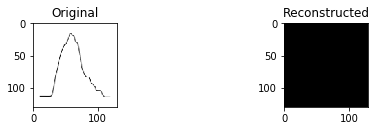

train_loss: 0.9996860106786092,    valid_loss: 0.9998830020427704
... after Epoch 10


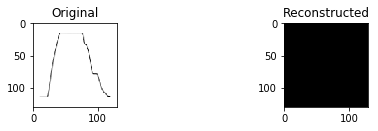

train_loss: 0.9999869247277577,    valid_loss: 1.0000339686870574
... after Epoch 11


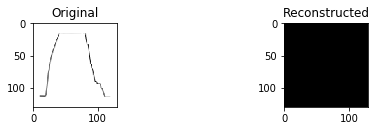

train_loss: 0.9999802966912588,    valid_loss: 1.0000932315985362
... after Epoch 12


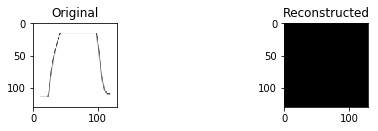

train_loss: 1.0004125197728475,    valid_loss: 0.9998045802116394
... after Epoch 13


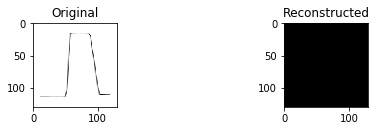

train_loss: 0.9999775985876719,    valid_loss: 1.0000250359376273
... after Epoch 14


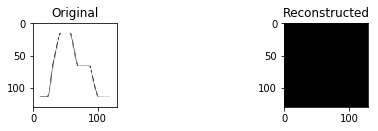

train_loss: 0.9998038073380788,    valid_loss: 0.9997524519761404
... after Epoch 15


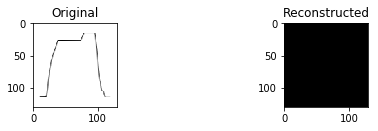

train_loss: 1.0001157442728679,    valid_loss: 0.9997161428133646
... after Epoch 16


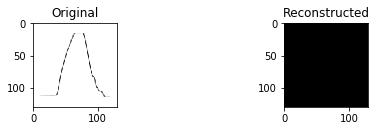

train_loss: 0.9997687578201294,    valid_loss: 1.0001985549926757
... after Epoch 17


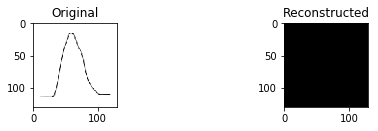

train_loss: 0.9995811223983765,    valid_loss: 0.9997215867042542
... after Epoch 18


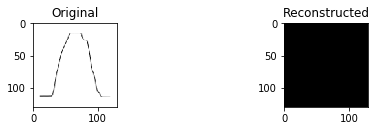

train_loss: 1.0002493719259897,    valid_loss: 1.00015629529953
... after Epoch 19


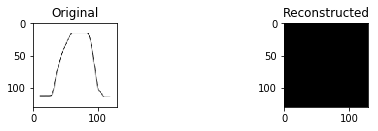

train_loss: 0.9999414642651876,    valid_loss: 0.9998952746391296
... after Epoch 20


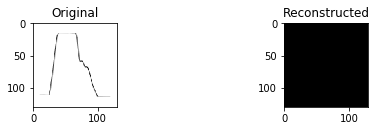

train_loss: 0.9998853405316671,    valid_loss: 0.99979101618131
... after Epoch 21


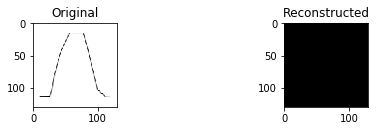

train_loss: 0.9996998329957326,    valid_loss: 1.0000467638174693
... after Epoch 22


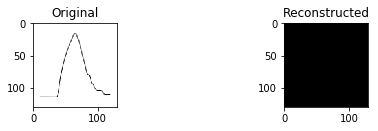

train_loss: 1.0000798881053925,    valid_loss: 0.9998633364836375
... after Epoch 23


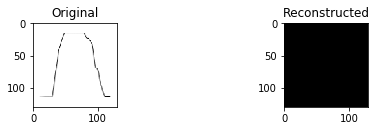

train_loss: 0.9999094625314077,    valid_loss: 0.9999396880467732
... after Epoch 24


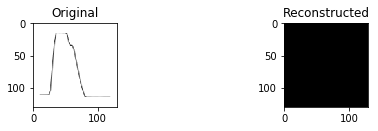

train_loss: 0.9997686624526978,    valid_loss: 1.000006862481435
... after Epoch 25


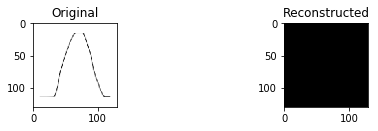

train_loss: 1.000154725710551,    valid_loss: 0.9997823417186738
... after Epoch 26


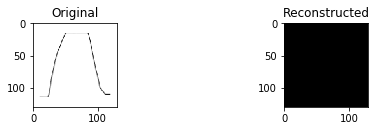

train_loss: 1.0000320553779602,    valid_loss: 1.0000558038552603
... after Epoch 27


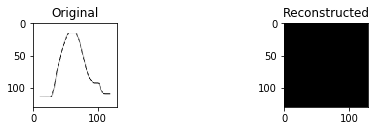

train_loss: 1.0001340985298157,    valid_loss: 0.9999777555465699
... after Epoch 28


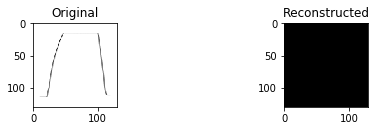

train_loss: 1.000190524260203,    valid_loss: 0.9999429762363434
... after Epoch 29


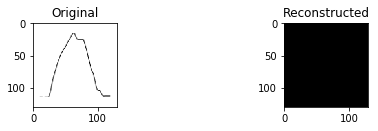

train_loss: 0.9998824715614318,    valid_loss: 0.9996986667315165
... after Epoch 30


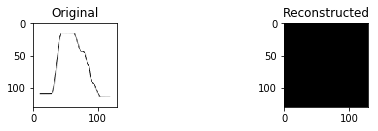

train_loss: 1.0001940310001374,    valid_loss: 0.9999335408210754
... after Epoch 31


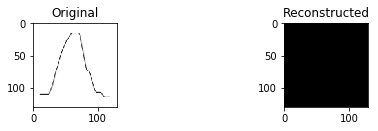

train_loss: 1.0000897745291393,    valid_loss: 0.9998514572779338
... after Epoch 32


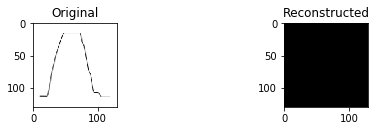

train_loss: 0.9996465265750885,    valid_loss: 1.0001817365487418
... after Epoch 33


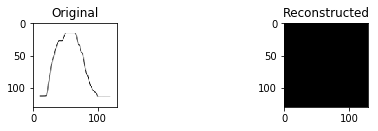

train_loss: 1.000083973010381,    valid_loss: 0.9999299764633178
... after Epoch 34


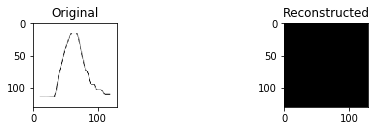

train_loss: 0.9999265611171723,    valid_loss: 1.000235366821289
... after Epoch 35


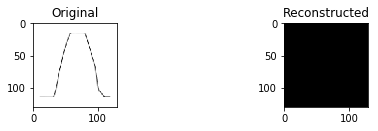

train_loss: 1.000102347135544,    valid_loss: 1.0001834531625111
... after Epoch 36


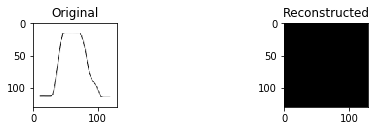

train_loss: 0.9996475636959076,    valid_loss: 0.9999312222003937
... after Epoch 37


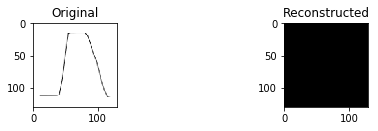

train_loss: 0.999980362256368,    valid_loss: 1.0000684042771657
... after Epoch 38


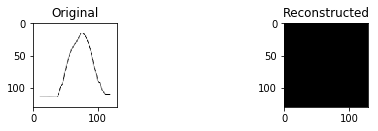

train_loss: 0.9998531738917033,    valid_loss: 0.9998541176319122
... after Epoch 39


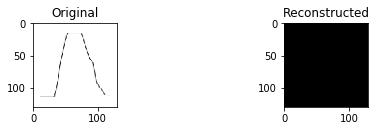

train_loss: 1.0000381728013357,    valid_loss: 1.0002407729625702
... after Epoch 40


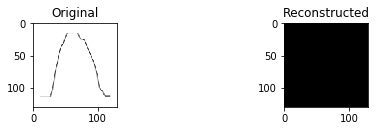

train_loss: 1.000003832578659,    valid_loss: 0.9996348957220713
... after Epoch 41


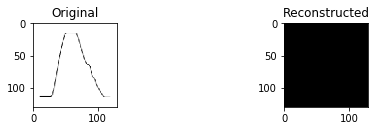

train_loss: 0.9998865882555644,    valid_loss: 0.9999405761559804
... after Epoch 42


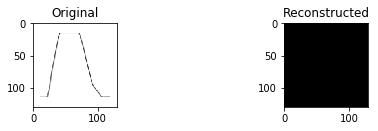

train_loss: 1.000007798274358,    valid_loss: 0.9997460563977559
... after Epoch 43


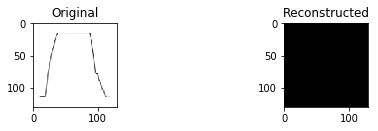

train_loss: 0.999924099445343,    valid_loss: 0.999999471505483
... after Epoch 44


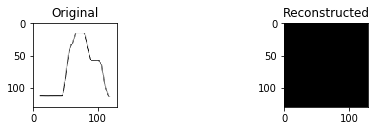

train_loss: 0.9999421894550323,    valid_loss: 1.0000245690345764
... after Epoch 45


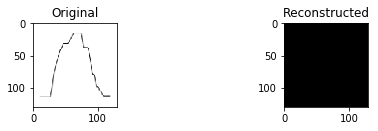

train_loss: 1.0001790344715118,    valid_loss: 0.9998994847138722
... after Epoch 46


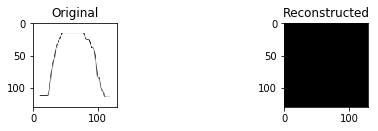

train_loss: 0.9997704029083252,    valid_loss: 0.9998509089152018
... after Epoch 47


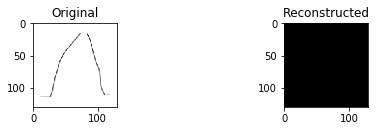

train_loss: 0.9999006489912668,    valid_loss: 0.9998914341131846
... after Epoch 48


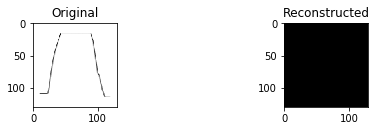

train_loss: 0.9998162388801575,    valid_loss: 0.999958089987437
... after Epoch 49


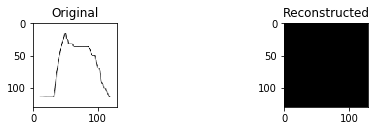

train_loss: 1.0000659068425497,    valid_loss: 0.9994676172733307
... after Epoch 50


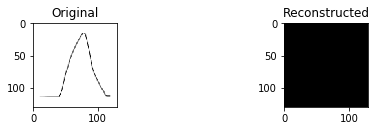

train_loss: 1.0001023093859354,    valid_loss: 0.9997714142004649


In [0]:
epochs = 50
train_loss = []
valid_loss = []
for epoch in range(1, epochs+1):
#     if(epoch==5): break

    # Let's train the model
    total_trn_loss = 0.0
    total_trn_iter = 0
    autoencoder.train()
    #for xb, yb in data.train_dl:
    for xb, yb in train_loader:
        xb = xb.cuda()
        optimizer.zero_grad()
        yhb = autoencoder(xb)
        
        loss = loss_func(yhb, xb)
        loss.backward()
        optimizer.step()
        
        total_trn_iter += 1
        total_trn_loss += loss.item()
        
    # Let's record the validation loss
    total_val_loss = 0.0
    total_val_iter = 0
    autoencoder.eval()
    #for xb, yb in data.valid_dl:  
#     for xb, yb in valid_loader:
    for xb, yb in train_loader:
        xb = xb.cuda()
        yhb = autoencoder(xb)
        loss = loss_func(yhb, xb)
        
        total_val_iter += 1
        total_val_loss += loss.item()
        
    # Let's visualize the first image of the last batch in our validation set
    orig = xb[0].cpu()
    reconstructed = yhb[0].cpu()

    print("... after Epoch", epoch)
    show_img(orig.data.numpy(), reconstructed.data.numpy())
    
    train_loss.append(total_trn_loss / total_trn_iter)
    valid_loss.append(total_val_loss / total_val_iter)
    print(f'train_loss: {train_loss[-1]},    valid_loss: {valid_loss[-1]}')

In [0]:
# save model
# torch.save(autoencoder.state_dict(), "./5.autoencoder.pth")

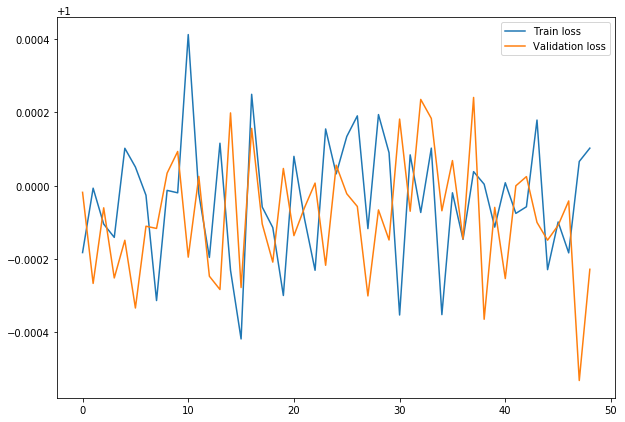

In [0]:
fig = plt.figure(figsize=(10, 7))
plt.plot(train_loss[1:], label='Train loss')
plt.plot(valid_loss[1:], label='Validation loss')
plt.legend()
plt.show()

## Check anomalies

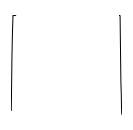

In [0]:
from PIL import Image

data_dir = trnpath/'png4'/'non'
filenames = os.listdir(data_dir); filenames
filenames = os.path.join(data_dir, '687200107051019-1min.png')
image = Image.open(filenames)  # PIL image
image

In [0]:
type(image)

PIL.PngImagePlugin.PngImageFile

In [0]:
npa = np.array(image); (npa).shape

(130, 133, 4)

In [0]:
# from PIL import Image
from torch.utils.data import Dataset, DataLoader

class AnomaliesDataset(Dataset):
  def __init__(self, data_dir, transform):      
    # store filenames
    self.filenames = os.listdir(data_dir)
    self.filenames = [os.path.join(data_dir, f) for f in self.filenames]
      
#     # the first character of the filename contains the label
#     self.labels = [int(filename.split('/')[-1][0]) for filename in self.filenames]
    self.transform = transform
      
  def __len__(self):
    # return size of dataset
    return len(self.filenames)
      
  def __getitem__(self, idx):
    # open image, apply transforms and return with label
#     image = Image.open(self.filenames[idx])  # PIL image
#     image = self.transform(image)
#     return np.array(image)
  
    png = Image.open(self.filenames[idx])
    #png = self.transform(png)
    png.load() # required for png.split()
    background = Image.new("RGB", png.size, (255, 255, 255))
    background.paste(png, mask=png.split()[3]) # 3 is the alpha channel
    background = self.transform(background)
    return np.array(background)

In [0]:
# train_transformer = T.Compose([
#   T.Resize([130,130]),              # resize the image to 64x64 
#   #transforms.RandomHorizontalFlip(),  # randomly flip image horizontally
#   T.ToTensor()             # transform it into a PyTorch Tensor
# ])

In [0]:
# str(trnpath/'png4'/'non')

In [0]:
anom_dataset = AnomaliesDataset(str(trnpath/'png4'/'non'), train_transform)
# anom_dataset = AnomaliesDataset(str(trnpath/'png4'/'non'), train_transformer)
len(anom_dataset)

81

In [0]:
anom_dataset[0].shape

(3, 130, 130)

In [0]:
anom_loader = torch.utils.data.DataLoader(anom_dataset, batch_size=8, shuffle=False)
# anom_loader = torch.utils.data.DataLoader(anom_dataset, shuffle=False)

### Show a batch of images

In [0]:
##xb,yb = iter(anom_loader).next()
xb = iter(anom_loader).next()
# xb_np = xb.cpu().data.numpy(); print(xb_np.shape)

xb.shape

torch.Size([8, 3, 130, 130])

In [0]:
xb[0].shape
# xb[0].imshow()

torch.Size([3, 130, 130])

In [0]:
# xb = np.transpose(xb, (0, 3, 1, 2))
# xb.shape

In [0]:
#import numpy as np
# pic = np.array(xb[0])
# pic.imshow()

In [0]:
# import torchvision
images = torchvision.utils.make_grid(xb)
images.shape

torch.Size([3, 134, 1058])

In [0]:
images = np.transpose(images, (1,2,0))
images.shape

torch.Size([134, 1058, 3])

In [0]:
m,M = images.min(),images.max()
m,M

(tensor(-10.7542), tensor(0.1667))

In [0]:
images_sc = (1/(abs(m)*M))*images + 0.5 #scale the normalized image to the range 0,1
len(images_sc)

134

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


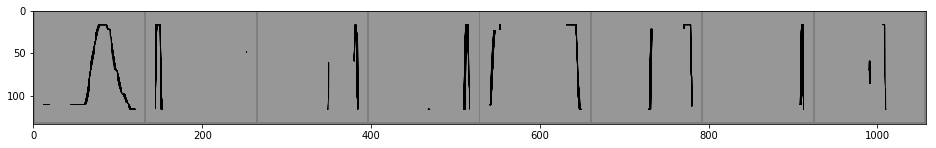

In [0]:
plt.figure(figsize=(16,12))
plt.imshow(images_sc)
plt.show()

In [0]:
xb.shape

torch.Size([8, 3, 130, 130])

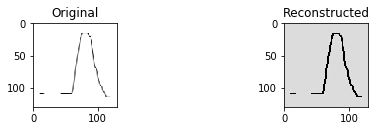

In [0]:
# type(xb)
# xb = xb.type('torch.FloatTensor')
yhb = autoencoder(xb.cuda())
# type(yhb)

orig = xb[0].cpu()
reconstructed = yhb[0].cpu()
show_img(orig.data.numpy(), reconstructed.data.numpy())

... after batch 0


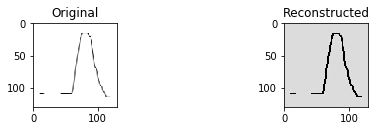

valid_loss: 0.6511813402175903
... after batch 1


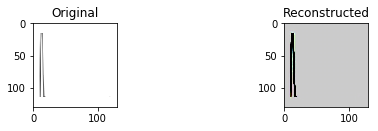

valid_loss: 0.7540523409843445
... after batch 2


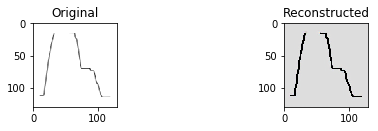

valid_loss: 0.7107000946998596
... after batch 3


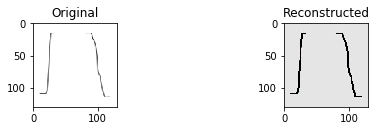

valid_loss: 0.7015379071235657
... after batch 4


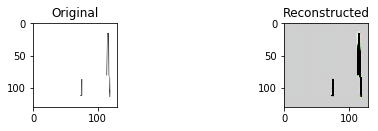

valid_loss: 0.7406317591667175
... after batch 5


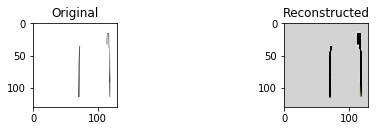

valid_loss: 0.6961442232131958
... after batch 6


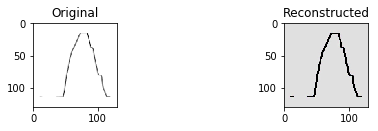

valid_loss: 0.7197420001029968
... after batch 7


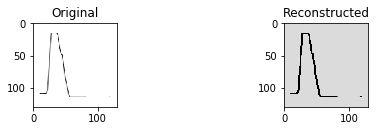

valid_loss: 0.7548202276229858
... after batch 8


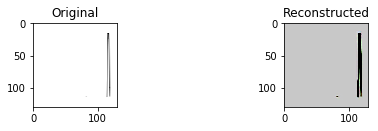

valid_loss: 0.7321485280990601
... after batch 9


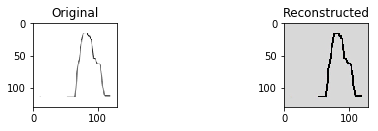

valid_loss: 0.723905622959137
... after batch 10


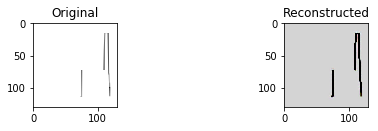

valid_loss: 0.6049339771270752


In [0]:
# epochs = 20
# train_loss = []
# valid_loss = []
# Let's record the validation loss
total_val_loss = 0.0
total_val_iter = 0
#autoencoder = autoencoder.cpu()
autoencoder.eval()
#for xb, yb in data.valid_dl:  
#     for xb, yb in valid_loader:
for i, xb in enumerate(anom_loader):
#     xb = np.transpose(xb, (0, 3, 1, 2))
#     xb = xb.type('torch.FloatTensor')
    xb = xb.cuda()
    yhb = autoencoder(xb)
    loss = loss_func(yhb, xb)

    #total_val_iter += 1
    #total_val_loss += loss.item()

    # Let's visualize the first image of the last batch in our validation set
    orig = xb[0].cpu()
    reconstructed = yhb[0].cpu()

    print("... after batch", i)
    show_img(orig.data.numpy(), reconstructed.data.numpy())
# train_loss.append(total_trn_loss / total_trn_iter)
# valid_loss.append(total_val_loss / total_val_iter)
    print(f'valid_loss: {loss.item()}')